In [24]:
# Hacky way to make nested notebooks able to acess coaffect module
# Once coaffect is its own published package or a separate repo, we can remove this and import as if any other module
import os
import sys
module_path = os.path.abspath(os.path.join('../..')) # 2 directories above
if module_path not in sys.path:
    sys.path.append(module_path)# Import essential modules to access classes for examples and exploration

# Touring NetworkX for the coaffect `Network` module
(See end of notebook for relevant definitions/properties as defined in NetworkX)

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

### Import modules from coaffect for tutorial

In [26]:
from coaffect import Agent, Simulation, UnitSchedule, Group

example_simulation_id = 1
example_duration = {
    'days': 1,
    'hours': 0,
    'minutes': 0,
    'seconds': 0
}
example_schedule = UnitSchedule(example_duration)
example_simulation = Simulation(example_simulation_id, example_schedule)

### Creating an empty directed graph

In [27]:
directed_graph = nx.DiGraph()

### Adding agents as nodes

In [28]:
agents = []
agent_unique_ids = ['a0', 'a1', 'a2']

# for each unique id, initialize an basic agent in the simulation and add to agents list
for unique_id in agent_unique_ids:
    a = Agent(unique_id, example_simulation)
    agents.append(a)

# add nodes from list of unique ids above, attribute each as an agent with common marker
directed_graph.add_nodes_from(agent_unique_ids, marker='agent', color='red')
print(directed_graph.nodes.data())

[('a0', {'marker': 'agent', 'color': 'red'}), ('a1', {'marker': 'agent', 'color': 'red'}), ('a2', {'marker': 'agent', 'color': 'red'})]


### Adding social ties between agents as directed edges

In [29]:
ties = []
first_agent_id = agent_unique_ids[0]

# for each unique id that is not the first agent's, create a directed tie to/from first agent
for unique_id in agent_unique_ids:
    if unique_id is not first_agent_id:
        tie_from_first = (first_agent_id, unique_id)
        tie_to_first = (unique_id, first_agent_id)
        ties.append(tie_from_first)
        ties.append(tie_to_first)

# add edges from list of social ties with common marker and strength of tie
directed_graph.add_edges_from(ties, marker='social_tie', strength=0)
    
#social_ties_between_agents
print(directed_graph.edges.data())

[('a0', 'a1', {'marker': 'social_tie', 'strength': 0}), ('a0', 'a2', {'marker': 'social_tie', 'strength': 0}), ('a1', 'a0', {'marker': 'social_tie', 'strength': 0}), ('a2', 'a0', {'marker': 'social_tie', 'strength': 0})]


### Adding groups as nodes

In [30]:
groups = []
group_unique_ids = ['g0', 'g1'] # only two groups for now

# for each unique id, initialize an basic group in the simulation and add to groups list
for unique_id in agent_unique_ids:
    g = Group(unique_id, example_simulation)
    groups.append(g)

# add nodes from list of unique ids above, attribute each as a group with common marker
directed_graph.add_nodes_from(group_unique_ids, marker='group', color='green')
print(directed_graph.nodes.data())

[('a0', {'marker': 'agent', 'color': 'red'}), ('a1', {'marker': 'agent', 'color': 'red'}), ('a2', {'marker': 'agent', 'color': 'red'}), ('g0', {'marker': 'group', 'color': 'green'}), ('g1', {'marker': 'group', 'color': 'green'})]


### Adding identifications from agents to groups as directed edges

In [31]:
identifications = []
first_group_id = group_unique_ids[0]
last_group_id = group_unique_ids[-1:][0]
last_agent_id = agent_unique_ids[-1:][0]

for agent_id in agent_unique_ids:
    if agent_id is not last_agent_id:
        identification_to_group = (agent_id, first_group_id)
    else:
        print('something')
        identification_to_group = (last_agent_id, last_group_id)
    identifications.append(identification_to_group)
    
directed_graph.add_edges_from(identifications, marker='identification', strength=0)
print(directed_graph.edges.data())

something
[('a0', 'a1', {'marker': 'social_tie', 'strength': 0}), ('a0', 'a2', {'marker': 'social_tie', 'strength': 0}), ('a0', 'g0', {'marker': 'identification', 'strength': 0}), ('a1', 'a0', {'marker': 'social_tie', 'strength': 0}), ('a1', 'g0', {'marker': 'identification', 'strength': 0}), ('a2', 'a0', {'marker': 'social_tie', 'strength': 0}), ('a2', 'g1', {'marker': 'identification', 'strength': 0})]


### Check some network properties thus far

In [32]:
print('Total number of nodes:', directed_graph.number_of_nodes())
print('Total number of edges:', directed_graph.number_of_edges())

Total number of nodes: 5
Total number of edges: 7


### Draw the network with `unique_ids` node labels

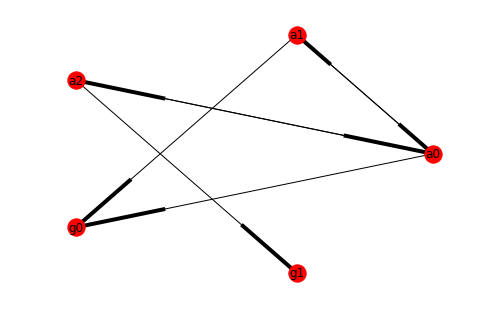

In [37]:
nx.draw_circular(directed_graph, with_labels=True)
plt.show()

## Important Properties of NetworkX

#### Nodes must be hashable objects (except `None`)!

**hashable** An object is hashable if it has a hash value which never changes during its lifetime (it needs a `__hash__()` method), and can be compared to other objects (it needs an `__eq__()` or `__cmp__()` method). Hashable objects which compare equal must have the same hash value.
Hashability makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally.
All of Python’s immutable built-in objects are hashable, while no mutable containers (such as lists or dictionar- ies) are. Objects which are instances of user-defined classes are hashable by default; they all compare unequal, and their hash value is their `id()`.

**node attribute** Nodes can have arbitrary Python objects assigned as attributes by using keyword/value pairs when adding a node or assigning to the `G.nodes[n]` attribute dictionary for the specified node `n`.